C:\Users\Jimpo\AppData\Local\Temp\ipykernel_28312\3890034256.py:10: DtypeWarning: Columns (26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  ttoadf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\After\\NGA_After_vader_analysis.csv")


POSITIVE WORDS



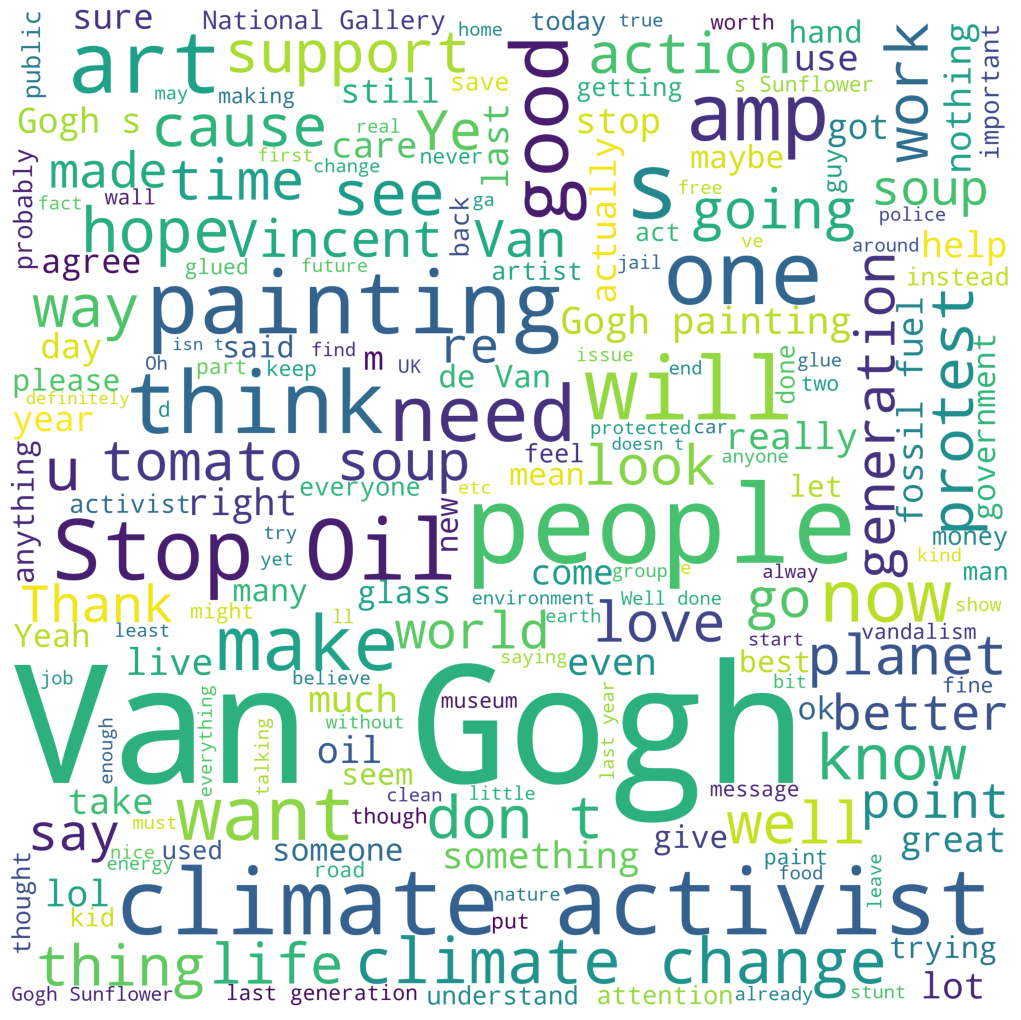

NEGATIVE WORDS



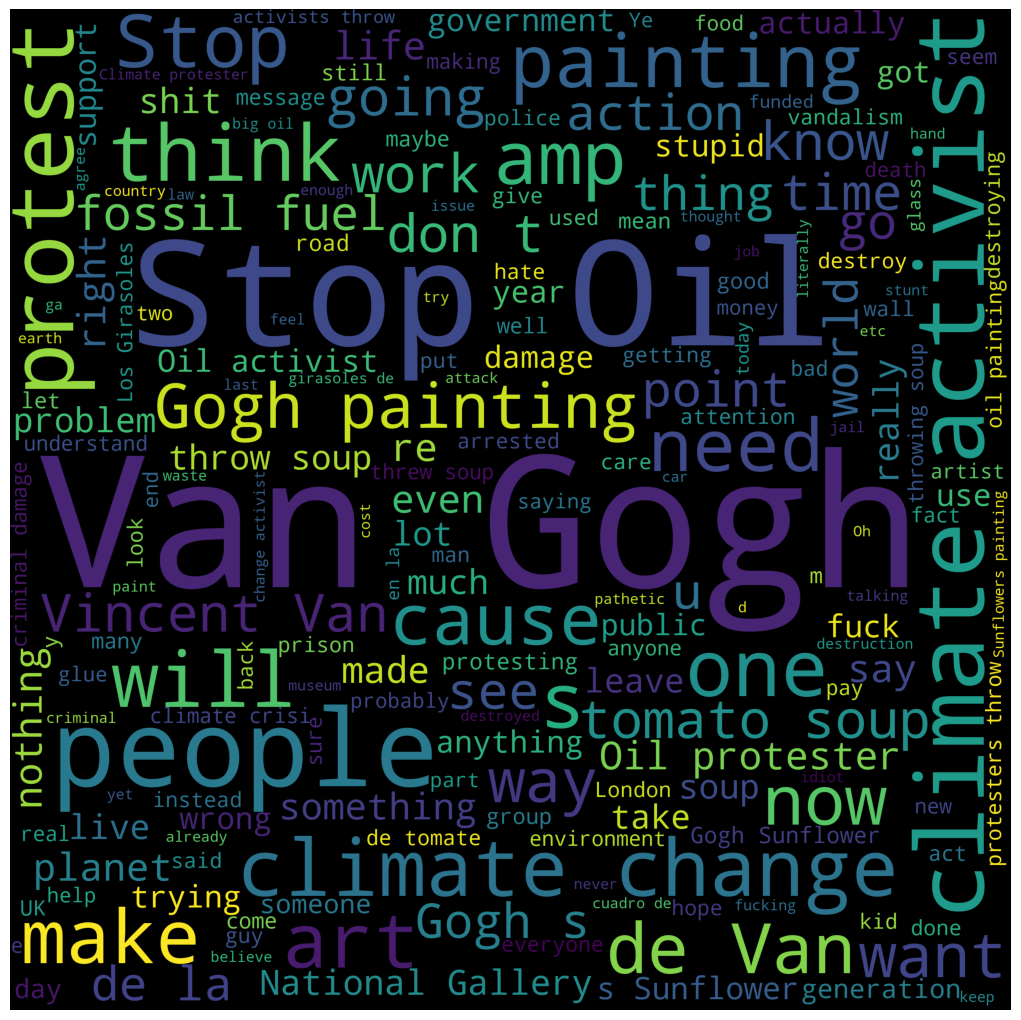

In [58]:
#CREAZIONE DI WORDCLOUD PER I TWEET POSITIVI E NEGATIVI DAL FILE CON I SENTIMENTI RICAVATI DA EXCEL
import sklearn
from sklearn.model_selection import train_test_split
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

#WORDCLOUD
ttoadf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\After\\NGA_After_vader_analysis.csv")

data = ttoadf[['rawContent','emotion']]

#split del dataset in trai e test
train,test = train_test_split(data, test_size = 0.1)

#rimozione sentimenti neutrali
train = train[train.emotion != "neutral"]

train_pos = train[ train['emotion'] == 'positive']
train_pos_text = train_pos['rawContent']

train_neg = train[ train['emotion'] == 'negative']
train_neg_text = train_neg['rawContent']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                      if 'http' not in word
                      and not word.startswith('@')
                      and not word.startswith('#')
                      and word != 'RT'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color = color,
                          width=2500,
                          height=2500).generate(cleaned_word)
    plt.figure(1, figsize=(13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("POSITIVE WORDS\n")
wordcloud_draw(train_pos_text, 'white')
print("NEGATIVE WORDS\n")
wordcloud_draw(train_neg_text, 'black')

C:\Users\Jimpo\AppData\Local\Temp\ipykernel_28312\963458114.py:9: DtypeWarning: Columns (26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\After\\NGA_After_vader_analysis.csv")


NEUTRAL WORDS



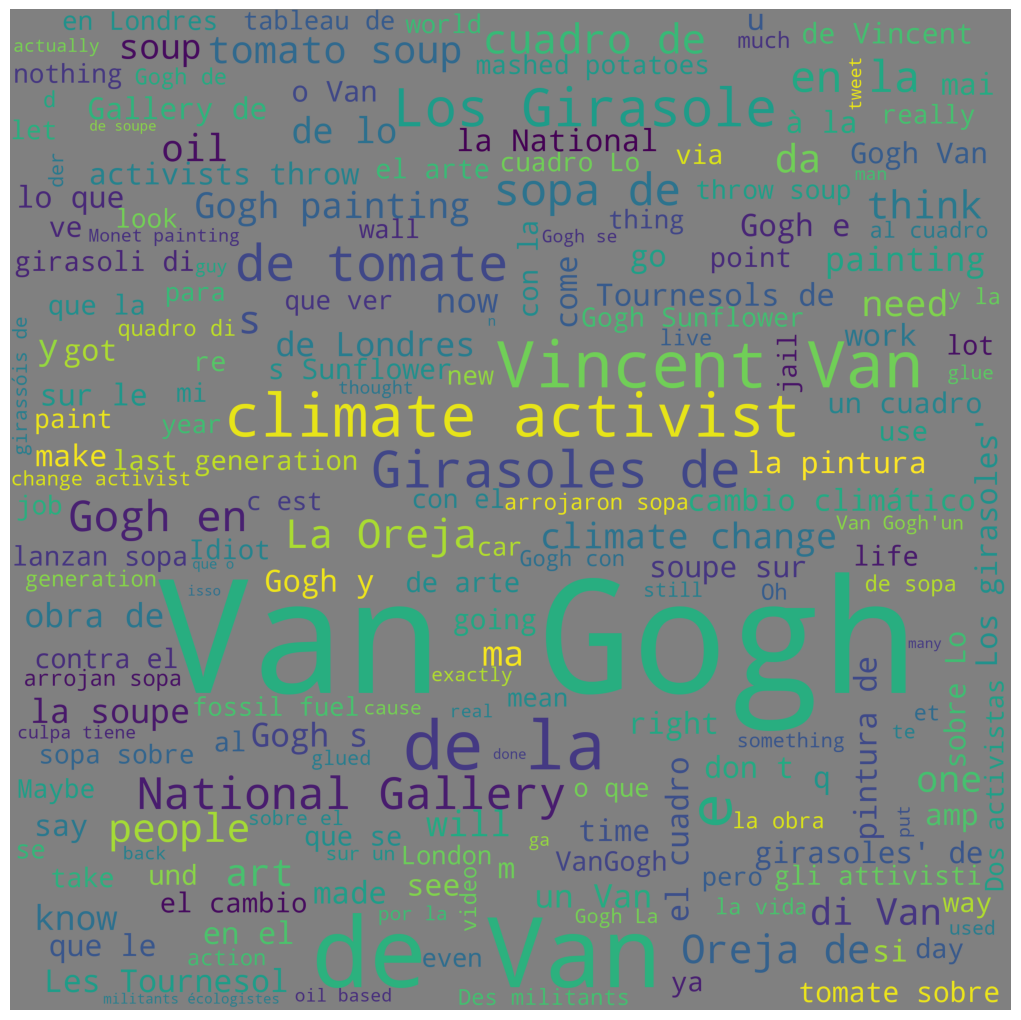

In [59]:
#CREAZIONE DI WORDCLOUD PER I TWEET NEUTRI
import sklearn
from sklearn.model_selection import train_test_split
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#WORDCLOUD
mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\After\\NGA_After_vader_analysis.csv")

data = mtspydf[['rawContent','emotion']]

#split del dataset in trai e test
train,test = train_test_split(data, test_size = 0.1)

train_neu = train[ train['emotion'] == 'neutral']
train_neu_text = train_neu['rawContent']


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                      if 'http' not in word
                      and not word.startswith('@')
                      and not word.startswith('#')
                      and word != 'RT'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color = color,
                          width=2500,
                          height=2500).generate(cleaned_word)
    plt.figure(1, figsize=(13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
print("NEUTRAL WORDS\n")
wordcloud_draw(train_neu_text, 'grey')

C:\Users\Jimpo\AppData\Local\Temp\ipykernel_28312\3515884069.py:1: DtypeWarning: Columns (26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\After\\NGA_After_vader_analysis.csv")


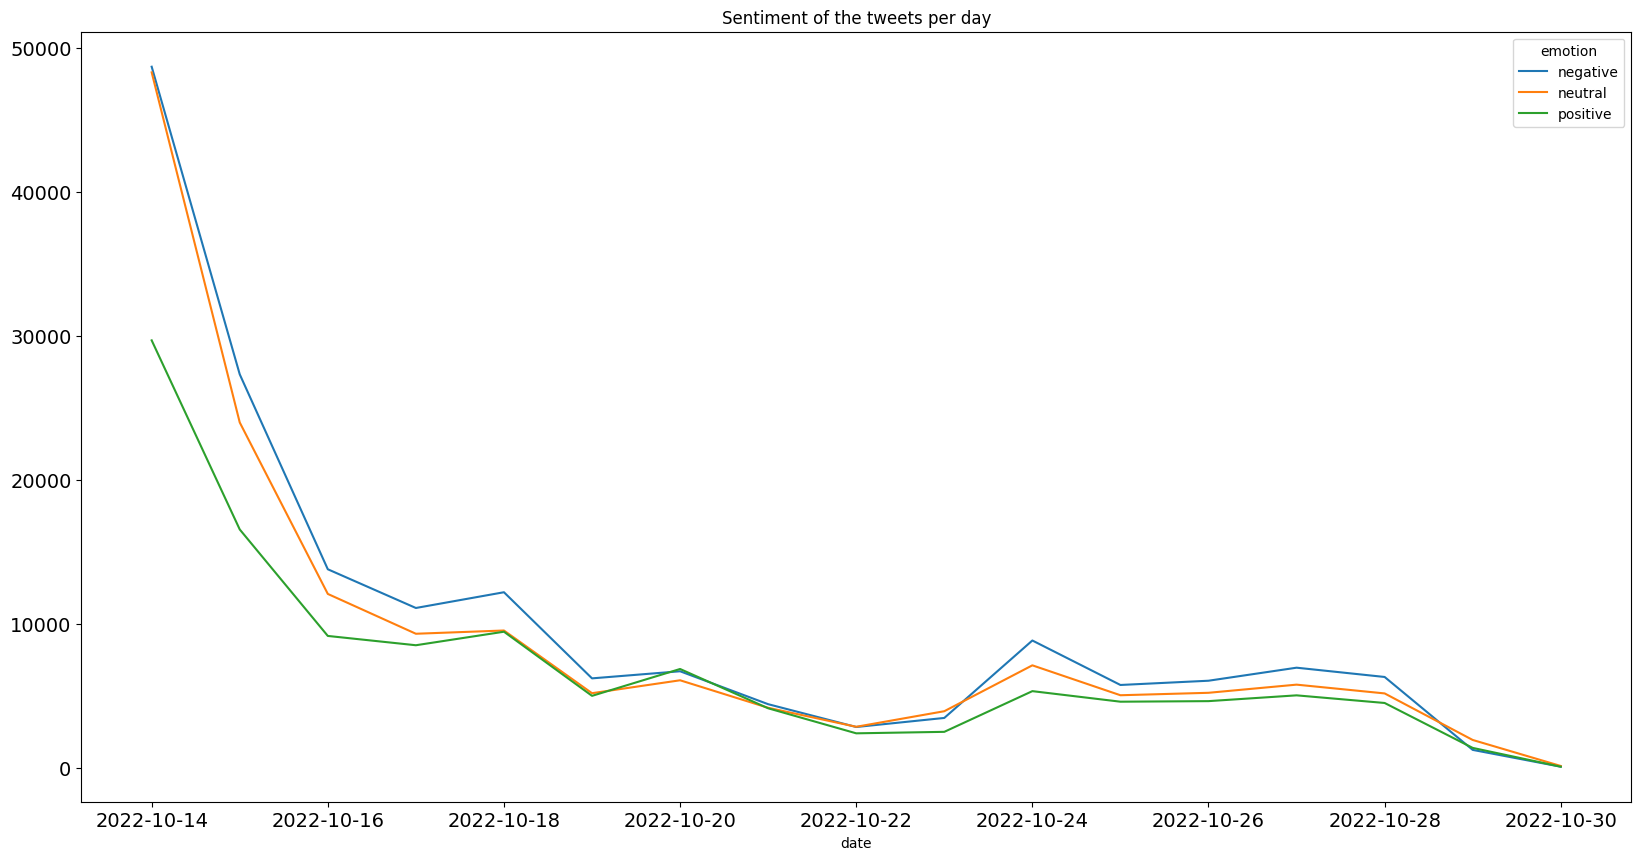

In [60]:
mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\After\\NGA_After_vader_analysis.csv")

#create a multi line chart with the sentiment of the tweets per day
mtspydf['date'] = pd.to_datetime(mtspydf['date'])
mtspydf['date'] = mtspydf['date'].dt.date
mtspydf['date'] = pd.to_datetime(mtspydf['date'])
mtspydf['date'] = mtspydf['date'].dt.strftime('%Y-%m-%d')

#group by date and emotion
mtspydf = mtspydf.groupby(['date','emotion']).size().reset_index(name='counts')

#pivot the data
mtspydf = mtspydf.pivot(index='date', columns='emotion', values='counts')

#fill the NaN values with 0
mtspydf = mtspydf.fillna(0)

#plot the data
mtspydf.plot(kind='line', figsize=(20,10), title='Sentiment of the tweets per day', fontsize=14)
 
plt.show()


In [ ]:
#EVENTS

#PARIS LOUVRE MUSEUM 
    #Louvre paris, activist disguised as old woman throws a cake at the painting, 29th may 2022 //done
    #Keywords used: attivisti, climate activist, just stop oil, mona lisa, mona lisa cake, ultima generazione, last generation
    #Hashtag searched: #Louvre, #MonaLisa
    #Account analyzed: @JustStop_Oil
    #Total data retrieved: 559MB

#LONDON NATIONAL GALLERY OF ART
    #National gallery of art, activists throw soup and glue themselves to the wall, 14th october 2022 //done
    #Keywords used: Attivisti, just stop oil, van gogh, national gallery of art, climate activists, last generation
    #Hashtag searched: #VanGogh, #NationalGalleryOfArt
    #Account analyzed: @JustStop_Oil, @ngadc
    #Total data retrieved: 1.14GB

#ITALY UFFIZI GALLERY
    #Florence uffizi gallery, activists glue themselves on the paintings, 22/07/2022 //done
    #Keywords used: attivisti, ultima generazione, uffizi, just stop oil, climate activist, botticelli
    #Hashtag searched: #Uffizi, #Botticelli
    #Account analyzed: @JustStop_Oil, @UffiziGalleries, @UltimaGenerazi1
    #Total data retrieved: 355MB

#EVENTO IN SPAGNA
    #Spain's prado museum, activists glue themselves on the paintings, 05/11/2022 //done
    #Keywords used: climate activist, last generation, just stop oil, prado museum, just stop oil, attivisti, francisco goya, activistas
    #Hashtag searched: #franciscogoya, #pradomuseum
    #Account analyzed: @museodelprado, @JustStop_Oil
    #Total data retrieved: 3.67GB

#TOTAL AMOUNT OF DATA RETRIEVED: 5.72GB
#also add user's opinion on the security of the museums that were attacked and how they feel about the paintings

In [ ]:
#QUERY USED TO SCRAPE TWEETS
import pandas as pd
import snscrape.modules.twitter as sntwitter

#scrape tweets from 2022-10-14 to 2022-10-29
query = "from:JustStop_Oil until:YYYY-MM-DD since:YYYY-MM-DD"
tweets = []

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
     tweets.append(tweet)
     
#save tweets to a csv file
df = pd.DataFrame(tweets)
df.to_csv('directory', index=False)

In [ ]:
#GRAPHS TO DO

#1) Number of tweets per day //done
#2) Number of tweets per day for each account //not needed
#3) Bar plot of the sentiment analysis of the tweets for each event pre and post //done
#4) Plot of the sentiment analysis of the replies for each account pre and post //not needed
#5) Mention network of the users pre and post //done
#6) Clustering of the users pre and post //DONE
#7) Find the main 3 topics of the tweets pre and post //to do
#8) Create network and charts per language based on the df //done
#9) Create a bipartite graph of the users and the hashtags //idk if needed

In [116]:
#VIEW THE MODIFIED DATAFRAME
import networkx as nx
import pandas as pd

df2 = df[['user', 'mentionedUsers']]
#remove the square brackets from the mentionedUsers column
df2['mentionedUsers'] = df2['mentionedUsers'].str.strip('[]').astype(str)

df2.head()
#G = nx.from_pandas_edgelist(df2, source = 'user.username', target= 'mentionedUsers.username', create_using=nx.DiGraph()))

user  \
0  {"username": "stax7580", "id": 861256621053366...   
1  {"username": "igorbrickil5S", "id": 2527780688...   
2  {"username": "AlekosPrete", "id": 447231894, "...   
3  {"username": "MeltingPotEU", "id": 206871686, ...   
4  {"username": "wbfe", "id": 463635153, "display...   

                                      mentionedUsers  
0  {"username": "AleMilia20", "id": 1481282956773...  
1  {"username": "PMO_W", "id": 831768450, "displa...  
2                                                nan  
3                                                nan  
4                                                nan

In [27]:
#FUNCTION THAT RETURNS THE MOST COMMON WORDS OF A DATAFRAME
#finding the most common words in the tweets
from collections import Counter
import re
 
#function to find the most common words in the tweets
def most_common_words(df):
    #find the most common words in the tweets
    #create a list of the tweets
    tweets = df['rawContent'].tolist()
    #create a list of the words in the tweets
    words = []
    for i in tweets:
        words += i.split()
    #find the most common words in the tweets
    common_words = Counter(words).most_common(20)
    return common_words

In [1]:
#IMPORTING LIBRARIES

import pandas as pd
import nltk

#downloading the vader lexicon
nltk.download('vader_lexicon')

#importing the vader sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#create a sentiment analyzer object
sent_analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jimpo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
#FUNCTION THAT RETURNS THE SENTIMENT ANALYSIS OF A DATAFRAME USING VADER
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#sentiment analysis of the tweets
def sentiment_analysis_vader(df):
    #create a list of the tweets
    tweets = df['rawContent'].tolist()
    #create a list of the sentiment of the tweets
    sentiment = []
    emotion = []
    for i in tweets:
        sentiment.append(sent_analyzer.polarity_scores(i)['compound'])
        if( sent_analyzer.polarity_scores(i)['compound'] == 0):
            emotion.append('neutral')
        elif( sent_analyzer.polarity_scores(i)['compound'] < 0.00):
            emotion.append('negative')
        else :
            emotion.append('positive')
    #add the sentiment list to the dataframe
    df['sentiment'] = sentiment
    df['emotion'] = emotion
    return df

In [23]:
#VADER ANALYSIS OF BIGGER DATAFRAME

from nltk.sentiment import SentimentIntensityAnalyzer

def sentiment_analysis_vader_bigdf(df):
    sent_analyzer = SentimentIntensityAnalyzer()
    df['compound'] = df['rawContent'].apply(lambda x: sent_analyzer.polarity_scores(str(x))['compound'])
    df['positive'] = df['rawContent'].apply(lambda x: sent_analyzer.polarity_scores(str(x))['pos'])
    df['negative'] = df['rawContent'].apply(lambda x: sent_analyzer.polarity_scores(str(x))['neg'])
    df['neutral'] = df['rawContent'].apply(lambda x: sent_analyzer.polarity_scores(str(x))['neu'])
    return df

In [3]:
#CODE TO EXTRACT THE USERNAME FROM THE USER AND MENTIONED USERS COLUMN
#extract username from a column
def extract_username(df):
    #create a list of the usernames
    usernames = []
    mentioned_usernames = []
    for i in df['user']:
        usernames.append(re.findall("username': '(.*?)'", i))
    for j in df['mentionedUsers']:
        mentioned_usernames.append(re.findall("username': '(.*?)'", j))
    #add the usernames list to the dataframe
    df['usernames'] = usernames
    df['mentioned_usernames'] = mentioned_usernames
    return df

In [829]:
#TOPIC MODELLING TEST

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

#topic modelling test
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel

#turn csv into dataframe
mlc_before_analysis = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\Before\\mlc_before_vader_analysis.csv")

#remove the square brackets from the mentionedUsers column
mlc_before_analysis['mentionedUsers'] = mlc_before_analysis['mentionedUsers'].str.strip('[]').astype(str)

#extract the usernames from the user and mentionedUsers columns
mlc_before_analysis_Wusernames = extract_username(mlc_before_analysis)

# Convert the lists in the 'target' column to tuples
mlc_before_analysis_Wusernames['usernames'] = mlc_before_analysis_Wusernames['usernames'].apply(tuple)

#take random 500 rows from the dataframe
mlc_before_analysis_Wusernames = mlc_before_analysis_Wusernames.sample(n=10000)

# Create a list of lists containing words from each tweet
data = mlc_before_analysis_Wusernames['rawContent'].str.split().tolist()

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(data)

# Filter out words that occur less than 10 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.5)
 
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in data]
 
# Train the model on the corpus.
lda_model = LdaModel(corpus=corpus,
                        id2word=dictionary,
                        num_topics=10,
                        random_state=100,
                        update_every=1,
                        chunksize=100,
                        passes=10,
                        alpha='auto',
                        per_word_topics=True)

# Print the Keyword in the 10 topics
#print(lda_model.print_topics())
doc_lda = lda_model[corpus]
 
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
 
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
 
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle
 
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis
 
#pyLDAvis.save_html(vis, 'lda.html')


Perplexity:  -6.3047687379893125

Coherence Score:  0.4701606860775868


c:\Users\Jimpo\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.313819 -0.009887       1        1  42.533977
1     -0.279631  0.107866       2        1  16.585365
9     -0.087934 -0.184630       3        1   8.706612
3      0.134823 -0.001685       4        1   5.917645
0      0.068083 -0.182778       5        1   5.712406
7      0.094797 -0.154117       6        1   4.649948
4      0.146766  0.106327       7        1   4.451782
8      0.099243  0.251798       8        1   3.921004
2      0.091184 -0.125478       9        1   3.803630
5      0.046488  0.192582      10        1   3.717631, topic_info=     Term         Freq        Total Category  logprob  loglift
19    the  6800.000000  6800.000000  Default  30.0000  30.0000
74      I  1782.000000  1782.000000  Default  29.0000  29.0000
49   Mona  1210.000000  1210.000000  Default  28.0000  28.0000
48   Lisa   958.000000   958.000000  Default  27.0000  27.0000
132    of  3497.000000  3497.000000  Default  26.0000  26.0000
..    ...          ...          ...      ...      ...      ...
1      la   278.105396   366.026498  Topic10  -2.9466   3.0174
72     un    95.926177   127.998644  Topic10  -4.0110   3.0036
51     no   120.440607   398.182074  Topic10  -3.7834   2.0963
3      me    69.416723   412.211289  Topic10  -4.3345   1.5107
55      a    89.421541  3310.125149  Topic10  -4.0812  -0.3193

[366 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
783       4  0.989504             !
1464     10  0.989920         "Mona
1454      5  0.994139  #JustStopOil
510      10  0.990421       #Louvre
475       9  0.985043     #Monalisa
...     ...       ...           ...
918       7  0.969184             à
312       7  0.991559             é
13        8  0.994872             –
1502      5  0.983564             —
264       7  0.976461             😂

[354 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 10, 4, 1, 8, 5, 9, 3, 6])

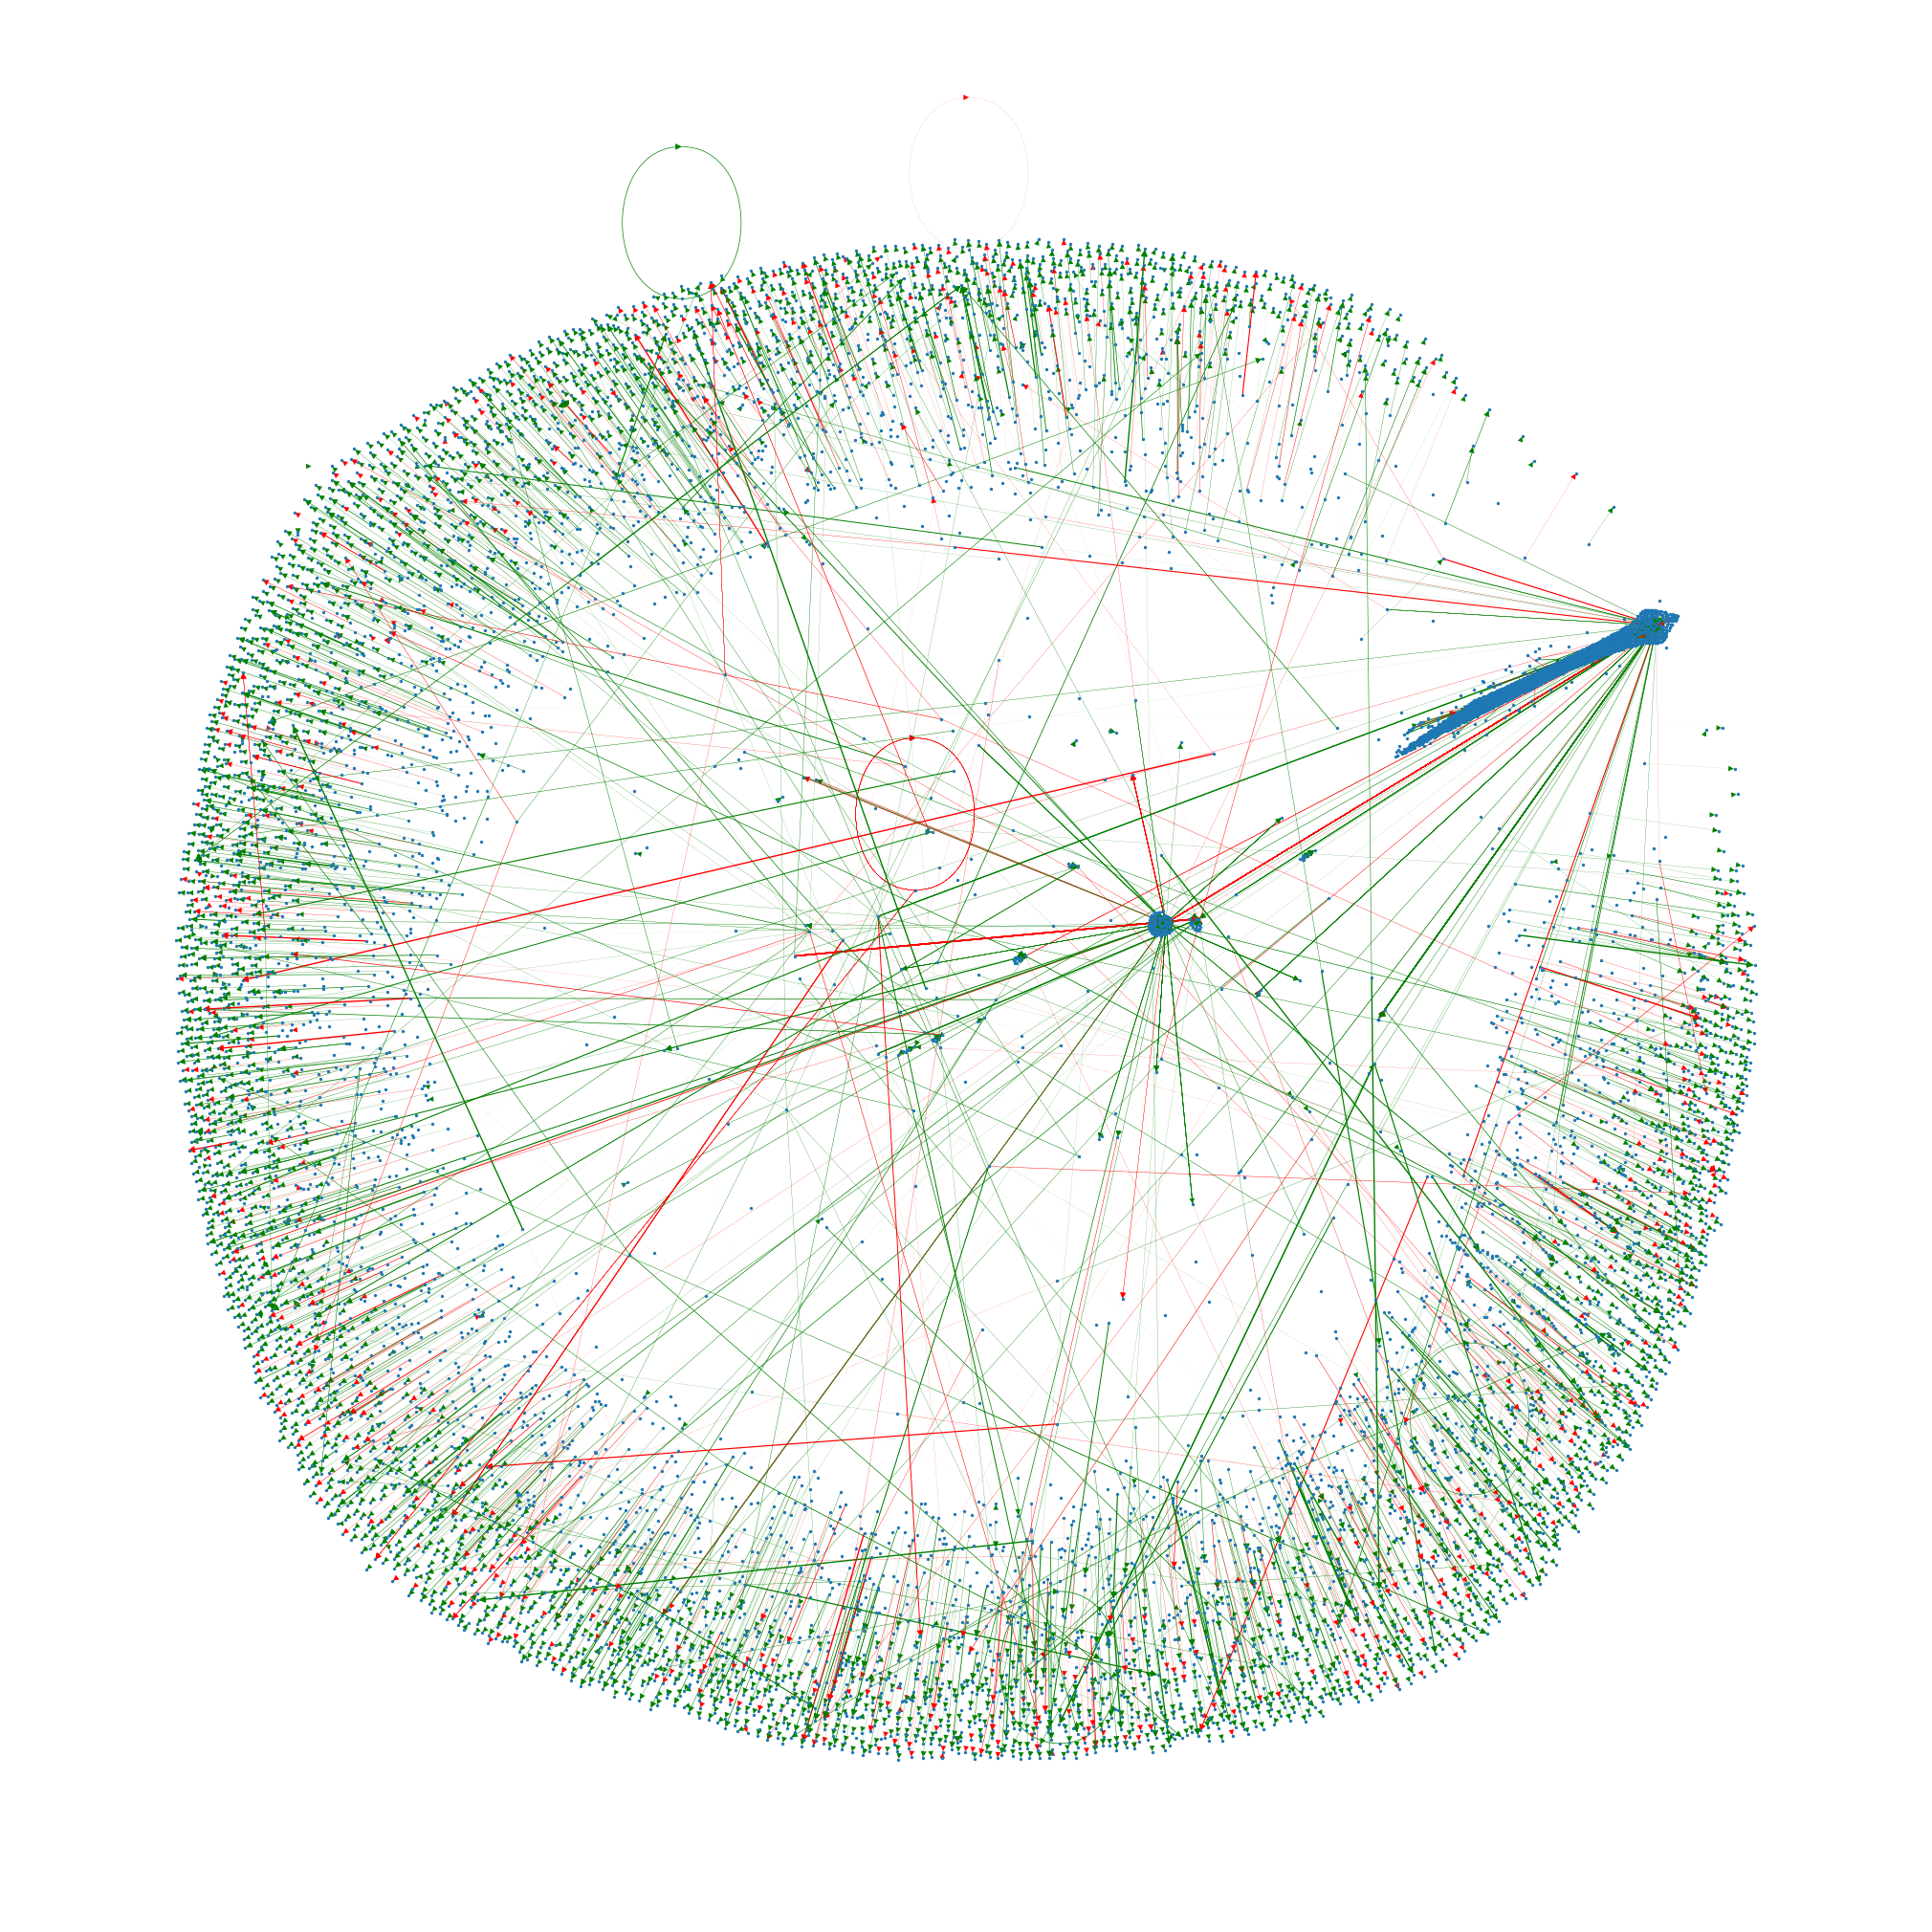

In [112]:
#CREATION OF A NETWORK GRAPH WITH NODES AS USERS, EDGES AS MENTIONS AND EDGE ATTRIBUTE AS THE SENTIMENT SCORE

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import re

#turn csv into dataframe
mlc_before_analysis = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\Before\\mlc_before_analysis.csv")

#remove the square brackets from the mentionedUsers column
mlc_before_analysis['mentionedUsers'] = mlc_before_analysis['mentionedUsers'].str.strip('[]').astype(str)

#extract the usernames from the user and mentionedUsers columns
mlc_before_analysis_Wusernames = extract_username(mlc_before_analysis)

# Convert the lists in the 'target' column to tuples
mlc_before_analysis_Wusernames['usernames'] = mlc_before_analysis_Wusernames['usernames'].apply(tuple)
mlc_before_analysis_Wusernames['mentioned_usernames'] = mlc_before_analysis_Wusernames['mentioned_usernames'].apply(tuple)

#take random 500 rows from the dataframe
mlc_before_analysis_Wusernames = mlc_before_analysis_Wusernames.sample(n=10000)

G = nx.from_pandas_edgelist(mlc_before_analysis_Wusernames,
                            source = 'usernames',
                            target='mentioned_usernames',
                            edge_attr='sentiment',
                            create_using=nx.MultiDiGraph())
#draw the graph
#increase the size of the graph
plt.figure(figsize=(20,20))

#nx.draw(G, with_labels=False, node_size=2, width=0.8)

 
#change the edge colour to red if the sentiment score is negative and green if the sentiment score is positive
edge_colours = ['red' if G[u][v][0]['sentiment'] < 0 else 'green' for u,v in G.edges()]

#change the edge width to the sentiment score
edge_widths = [G[u][v][0]['sentiment'] for u,v in G.edges()]

#draw the graph
nx.draw(G, with_labels=False, node_size=2, width=edge_widths, edge_color=edge_colours)

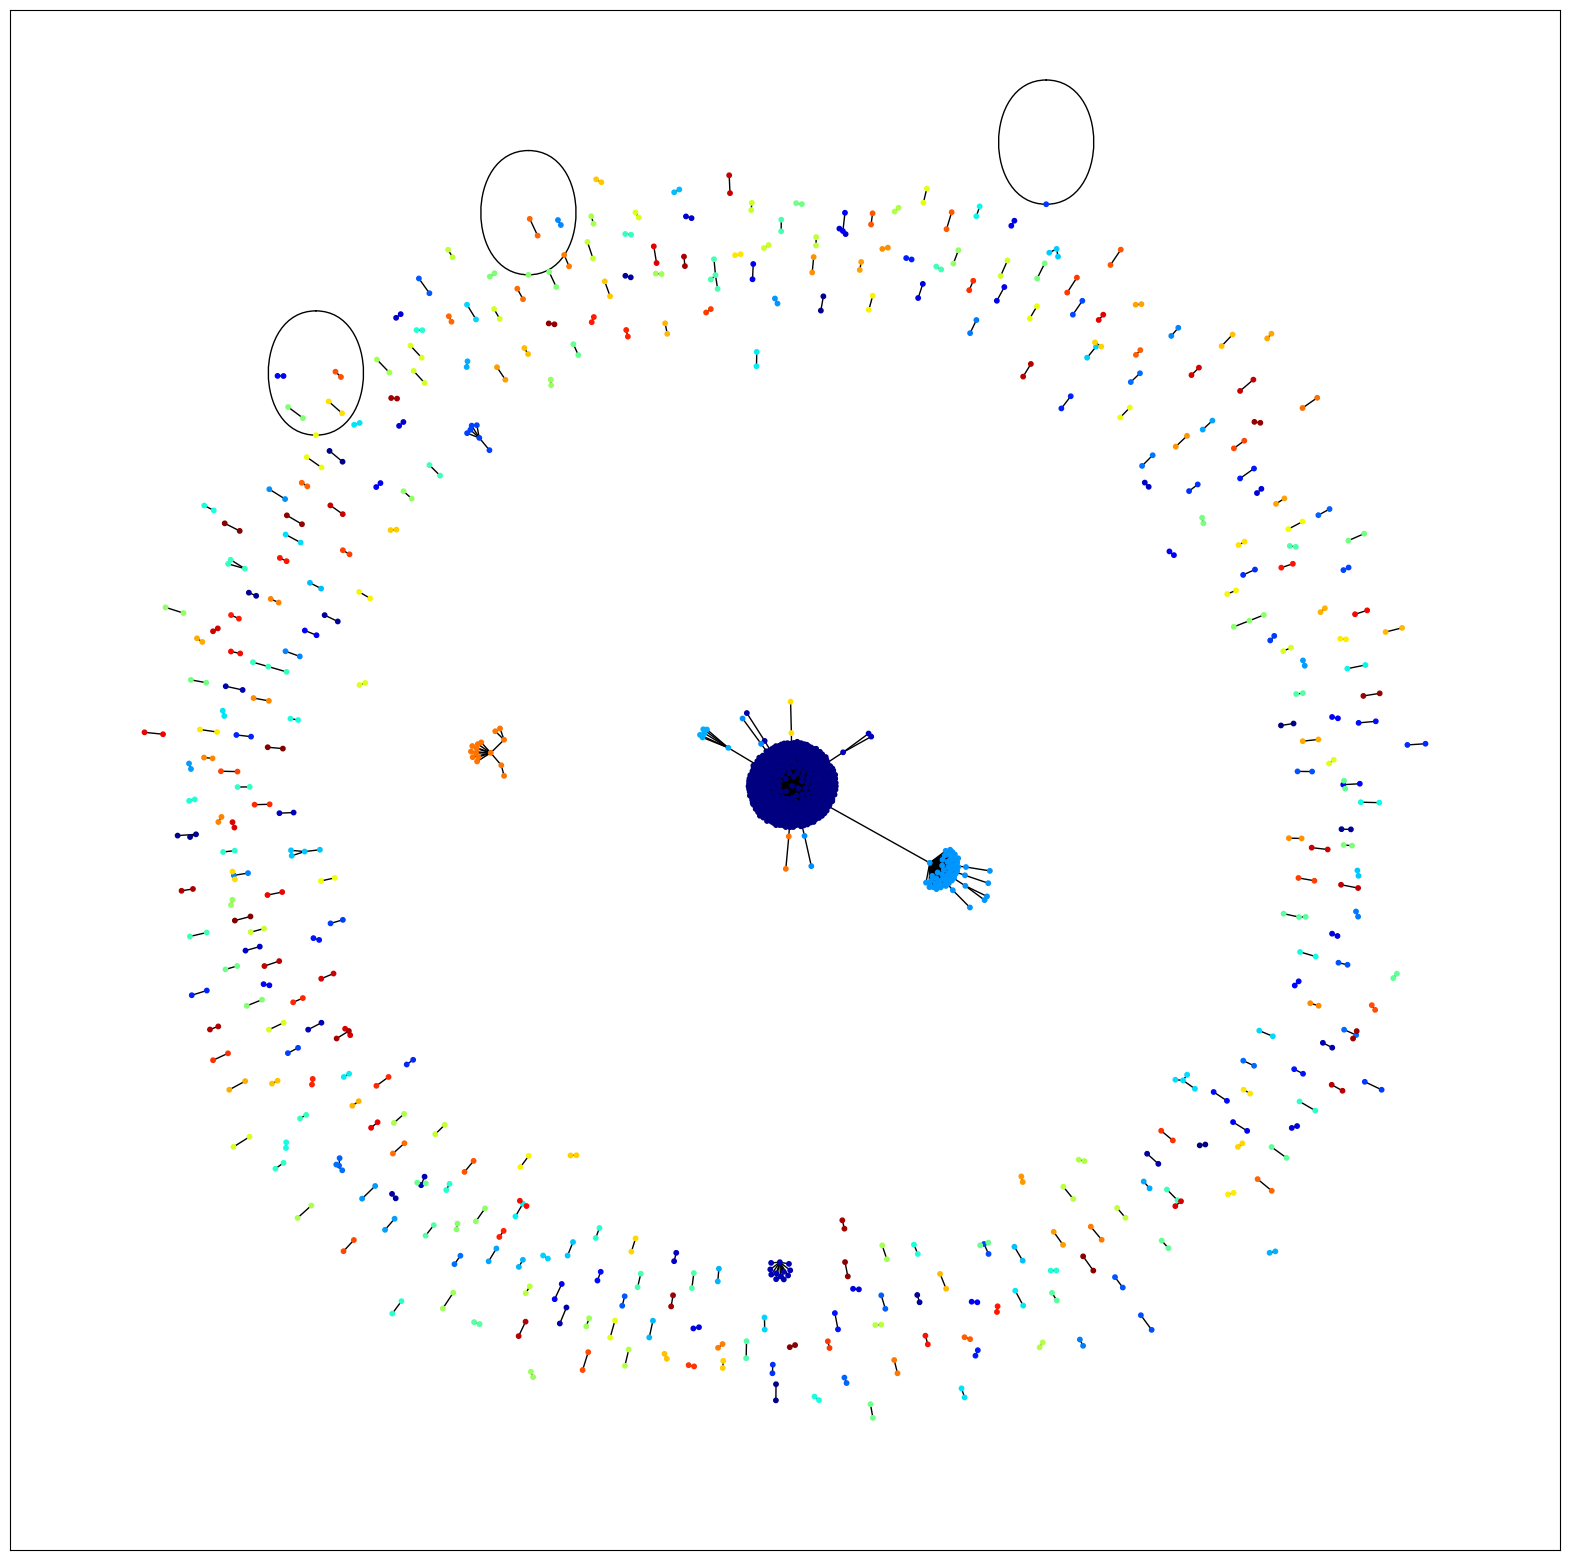

In [167]:
#NETWORK GRAPH
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

#importing libraries for community detection
import community.community_louvain as community_louvain
import matplotlib.cm as cm

#turn csv into dataframe
mlc_before_analysis = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\Before\\mlc_before_analysis.csv")
 
#remove the square brackets from the mentionedUsers column
mlc_before_analysis['mentionedUsers'] = mlc_before_analysis['mentionedUsers'].str.strip('[]').astype(str)

#extract the usernames from the user and mentionedUsers columns
mlc_before_analysis_Wusernames = extract_username(mlc_before_analysis)

# Convert the lists in the 'target' column to tuples
mlc_before_analysis_Wusernames['usernames'] = mlc_before_analysis_Wusernames['usernames'].apply(tuple)
mlc_before_analysis_Wusernames['mentioned_usernames'] = mlc_before_analysis_Wusernames['mentioned_usernames'].apply(tuple)

#take random 500 rows from the dataframe
mlc_before_analysis_Wusernames = mlc_before_analysis_Wusernames.sample(n=1000)

#create a network with clusters of users who mention each other more often 
G = nx.from_pandas_edgelist(mlc_before_analysis_Wusernames,
                            source = 'usernames',
                            target='mentioned_usernames',
                            create_using=nx.Graph())

#find the communities in the network
partition = community_louvain.best_partition(G)

#increase the size of the graph
plt.figure(figsize=(20,20))

#create a legend for the graph to show the different communities
#plt.legend(handles=[plt.scatter([],[], c=cm.jet(i/len(partition)), s=100) for i in range(len(partition))], labels=list(partition.keys()), loc='upper left', bbox_to_anchor=(1,1))
#each color represents a different user

#draw the graph with green nodes as positive sentiment and red nodes as negative sentiment
nx.draw_networkx(G, pos=nx.spring_layout(G), cmap=plt.get_cmap('jet'), node_color=list(partition.values()), node_size=10, with_labels=False, font_size=8) 

In [141]:
#create a list of the communities
communities = list(set(partition.values()))

#calculate the modularity of the network
modularity = community_louvain.modularity(partition, G)

#print the modularity
print("Modularity: ", modularity)

'''
The modularity measures how well the network is partitioned into communities (clusters)
The value of 0.7 modularity means that the network is well partitioned into communities
A modularity score of 0.7 indicates that the network partition generated by the Louvain algorithm
has a high degree of community structure, but is not a perfect community structure

In summary, modularity is a measure of the quality of the division of a network into communities,
based on the density of connections within and between communities and it is often used as a criterion for community detection algorithms.
'''

Modularity:  0.7702439909534367


In [4]:
#CREATION OF A FUNCTION THAT CREATES THE DATAFRAME FOR GEPHI VISUALISATION
def creation_gephi(df_gephi):
    #df_gephi = sentiment_analysis_vader(df)
    #remove the square brackets from the mentionedUsers column
    df_gephi['mentionedUsers'] = df_gephi['mentionedUsers'].str.strip('[]').astype(str)
    
    df_gephi = extract_username(df_gephi)
    #save the dataframe with only the usernames, mentioned usernames and sentiment score columns
    df_gephi = df_gephi[['usernames', 'mentioned_usernames']]
    return df_gephi

In [5]:
#DEFINING A FUNCTION TO CLEAN THE DATAFRAME
def clean_dataframe_for_gephi(df):
    df = df[df['mentioned_usernames'] != '[]']

    #remove the square brackets from the columns
    df['mentioned_usernames'] = df['mentioned_usernames'].str.strip('[]').astype(str)
    df['usernames'] = df['usernames'].str.strip('[]').astype(str)

    #remove all single quotes from the columns
    df['mentioned_usernames'] = df['mentioned_usernames'].str.replace("'", "")
    df['usernames'] = df['usernames'].str.replace("'", "")

    #split the mentiond usernames column into multiple rows
    df = df.set_index(['usernames'])['mentioned_usernames'].str.split(',', expand=True).stack().reset_index().rename(columns={0:'mentioned_usernames'})

    #remove the level_1 column
    df = df.drop(columns=['level_1'])

    #remove all the rows with null values
    df = df.dropna()

    #remove duplicate rows
    df = df.drop_duplicates()

    #remove rows where the usernames and mentioned usernames are the same
    df = df[df['usernames'] != df['mentioned_usernames']]
    
    return df

In [ ]:
#TEMPLATE FOR THE CREATION OF THE DATAFRAME FOR GEPHI VISUALISATION
import pandas as pd

#read the first csv file
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\MonaLisaCake_AFTER.csv")

#create the dataframe for gephi
df = creation_gephi(df)

#saving the df to a csv file
df.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\mlc_after_gephi.csv", index=False)

#read the gephi csv file
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\mlc_after_gephi.csv")

#clean the dataframe
df = clean_dataframe_for_gephi(df)

#save the dataframe as a csv file
df.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\mlc_after_gephi_cleaned.csv", index=False)


C:\Users\Jimpo\AppData\Local\Temp\ipykernel_28312\3350900771.py:5: DtypeWarning: Columns (26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\After\\NGA_After_vader_analysis.csv")


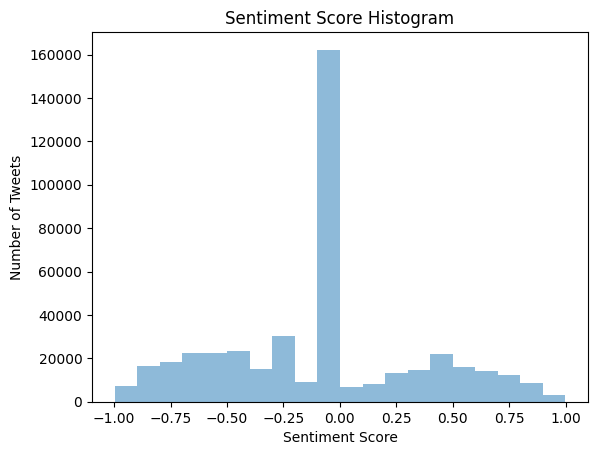

In [64]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\After\\NGA_After_vader_analysis.csv")

#create a line chart with sentiment score on the x axis and the number of tweets on the y axis from the mlc_before_analysis.csv file

#the line of code below create a histogram of the sentiment score
df['sentiment'].plot.hist(bins=20, alpha=0.5)
#changing the y label to Number of Tweets and the x label to Sentiment Score
plt.ylabel('Number of Tweets')
plt.xlabel('Sentiment Score')
plt.title('Sentiment Score Histogram')
plt.show()


C:\Users\Jimpo\AppData\Local\Temp\ipykernel_28312\1516017553.py:6: DtypeWarning: Columns (26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\After\\NGA_After_vader_analysis.csv")


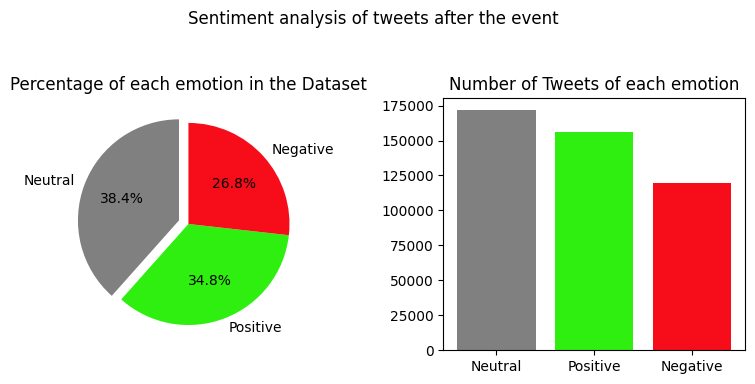

In [65]:
#CREATION OF BAR AND PIE CHARTS FOR THE SENTIMENT ANALYSIS OF THE DATAFRAME
import pandas as pd
import matplotlib.pyplot as plt

#count the number of positive, negative and neutral tweets
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\After\\NGA_After_vader_analysis.csv")

#add a column to the dataframe to show the sentiment of the tweet
df['tweet_sentiment'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

#pie data
pie_data = [df['tweet_sentiment'].value_counts()[0], df['tweet_sentiment'].value_counts()[1], df['tweet_sentiment'].value_counts()[2]]

#pie labels
pie_labels = ['Neutral', 'Positive', 'Negative']

#bar data
bar_data = [df['tweet_sentiment'].value_counts()[0], df['tweet_sentiment'].value_counts()[1], df['tweet_sentiment'].value_counts()[2]]

#bar labels
bar_labels = ['Neutral', 'Positive', 'Negative']

# Create the figure and subplot grid
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Create the pie chart in the first subplot
axs[0].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=['grey', '#2FEF10', '#f70d1a'] , explode=(0.1, 0, 0))

# Create the bar chart in the second subplot
axs[1].bar(bar_labels, bar_data, color=['grey', '#2FEF10', '#f70d1a'])

# Add labels and titles to the charts
axs[0].set_title('Percentage of each emotion in the Dataset')
axs[1].set_title('Number of Tweets of each emotion')
fig.suptitle('Sentiment analysis of tweets after the event')

# Adjust the layout and spacing of the subplots
fig.tight_layout(pad=2)

# Show the charts
plt.show()

C:\Users\Jimpo\AppData\Local\Temp\ipykernel_28312\4288948874.py:12: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  mlc_before_analysis = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\mlc_after_vader_analysis.csv")


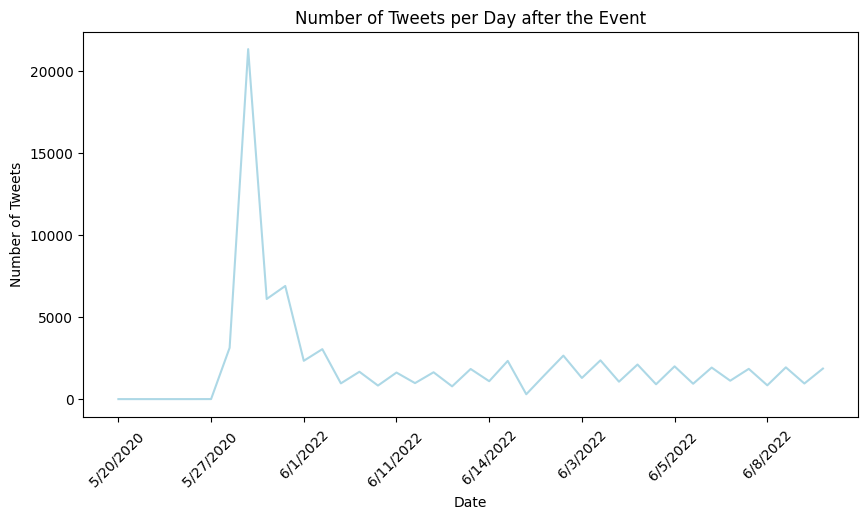

In [68]:
#LINE CHART TWEETS PER HOUR BEFORE THE EVENT

import pandas as pd
import matplotlib.pyplot as plt

#creation of a line chart to show the number of tweets per hour before the event
#mlc_before_analysis['date'].str[:-5].value_counts().sort_index().plot(kind='line', figsize=(10, 5), color='#2FEF10')
#increase number of xticks to show every day
#plt.xticks(rotation=45)

# read the csv file
mlc_before_analysis = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\mlc_after_vader_analysis.csv")

# remove duplicate rows
mlc_before_analysis = mlc_before_analysis.drop_duplicates()

#create line chart of tweets per day
mlc_before_analysis['date'].str[:-5].value_counts().sort_index().plot(kind='line', figsize=(10, 5), color='lightblue')

#increase number of xticks to show every day
plt.xticks(rotation=45)

#change the x label to Date and the y label to Number of Tweets
plt.ylabel('Number of Tweets')

plt.xlabel('Date')

#change the title of the chart
plt.title('Number of Tweets per Day after the Event')

#show the chart
plt.show()

#TO FIX: the x axis is showing redundant dates

In [6]:
def emotions_per_user(df):
    df = sentiment_analysis_vader(df)
    #remove the square brackets from the mentionedUsers column
    df['mentionedUsers'] = df['mentionedUsers'].str.strip('[]').astype(str)
    df = extract_username(df)
    
    #new dataframe with only the usernames and the emotions
    df = df[['usernames', 'emotion']]
    df['usernames'] = df['usernames'].astype(str)  # convert usernames to string type
    df = df.groupby('usernames')['emotion'].apply(list).reset_index(name='emotions')
    return df

In [8]:
#creating a dataframe with the usernames and the most relevant emotion per user
#THE DF RECEIVED HAS 2 COLUMNS, USERNAME AND EMOTIONS (LIST OF EMOTIONS)
def mre(df):
    #remove the square brackets from the all columns
    df['usernames'] = df['usernames'].str.strip('[]').astype(str)
    df['emotions'] = df['emotions'].str.strip('[]').astype(str)
    
    #find the emotion that appears the most for each user
    df['mre'] = df['emotions'].str.split(',').apply(lambda x: max(set(x), key=x.count))
    #count the number of times the most relevant emotion appears for each user and add 1 to the count
    df['mre_count'] = df['emotions'].str.split(',').apply(lambda x: x.count(max(set(x), key=x.count)))+1
    #create column with number of emotions per user
    df['number_of_emotions'] = df['emotions'].str.split(',').apply(lambda x: len(x))
    
    df['mre_percentage'] = (df['mre_count']/df['number_of_emotions'])*100
    
    #from the mre column, keep only 2 digits after the comma
    df['mre_percentage'] = df['mre_percentage'].round(2)
    
    #if the mre_percentage is >=100, then the mre_percentage is 100
    df['mre_percentage'] = df['mre_percentage'].apply(lambda x: 100 if x >= 100 else x)
    
    #remove the emotions column
    df = df.drop(['emotions'], axis=1)
    #remove the mre_count column
    df = df.drop(['mre_count'], axis=1)
    #remove the number_of_emotions column
    df = df.drop(['number_of_emotions'], axis=1)
    
    return df
    

In [10]:
#create dataframe with username, mentioned_usernames and emotion
def usernames_mentioned_usernames_emotion(df):
    df = sentiment_analysis_vader(df)
    df['mentionedUsers'] = df['mentionedUsers'].str.strip('[]').astype(str)
    df = extract_username(df)
    
    df = df[['usernames', 'mentioned_usernames', 'emotion']]
    df['usernames'] = df['usernames'].astype(str)
    df['mentioned_usernames'] = df['mentioned_usernames'].astype(str)
    df['emotion'] = df['emotion'].astype(str)
    return df

In [32]:
def usernames_mentioned_usernames_emotion_no_vader(df):
    df['mentionedUsers'] = df['mentionedUsers'].str.strip('[]').astype(str)
    df = extract_username_no_vader(df)
    
    df = df[['usernames', 'mentioned_usernames', 'emotion']]
    df['usernames'] = df['usernames'].astype(str)
    df['mentioned_usernames'] = df['mentioned_usernames'].astype(str)
    df['emotion'] = df['emotion'].astype(str)
    return df

In [31]:
def extract_username_no_vader(df):
    usernames = []
    mentioned_usernames = []
    for i in df['user']:
        try:
            usernames.append(re.findall("username': '(.*?)'", i))
        except TypeError as e:
            print(f"Error: {e}")
    for j in df['mentionedUsers']:
        try:
            mentioned_usernames.append(re.findall("username': '(.*?)'", j))
        except TypeError as e:
            print(f"Error: {e}")
    df['usernames'] = usernames
    df['mentioned_usernames'] = mentioned_usernames
    return df

In [46]:
#TEMPLATE FOR THE CREATION OF THE CSV FILES NEEDED FOR THE NETWORK ANALYSIS
import pandas as pd
import re

df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after.csv", encoding='cp1252')

#sentiment analysis with vader of the given dataframe
df = sentiment_analysis_vader(df)
df.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_vader_analysis.csv")

#creation of a csv file with the usernames, mentioned usernames and the emotion
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after.csv", encoding='cp1252')
df = usernames_mentioned_usernames_emotion(df)
df.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_usernames_w_mentions.csv")

#creation of the dataframe in csv for the data visualization in gephi
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after.csv",encoding='cp1252')
df = creation_gephi(df)
df.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_gephi.csv")
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_gephi.csv")
df = clean_dataframe_for_gephi(df)
df.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_gephi_cleaned.csv")

#creation of the dataframe in csv for the mre analysis
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after.csv",encoding='cp1252')
df = emotions_per_user(df)
df.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_users_emotions.csv")
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_users_emotions.csv")
df_mre= mre(df)
df_mre.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_mre.csv")

#creation of the dataframe of the just stop oil  ( or movement name) in csv for the data visualization
#delete the rows that do not contain JustStop_Oil as usernames or mentioned usernames
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_usernames_w_mentions.csv",encoding='cp1252')
#df = df[(df['usernames'] == "['JustStop_Oil']") | df['mentioned_usernames'].str.contains('JustStop_Oil')]
df = df[(df['usernames'] == "['UltimaGenerazi1']") | df['mentioned_usernames'].str.contains('UltimaGenerazi1')]
df.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_UG.csv")

C:\Users\Jimpo\AppData\Local\Temp\ipykernel_28312\3939221266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['usernames'] = df['usernames'].astype(str)
C:\Users\Jimpo\AppData\Local\Temp\ipykernel_28312\3939221266.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mentioned_usernames'] = df['mentioned_usernames'].astype(str)
C:\Users\Jimpo\AppData\Local\Temp\ipykernel_28312\3939221266.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [ ]:
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_vader_analysis.csv")

df = usernames_mentioned_usernames_emotion_no_vader(df)

#df.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\PradoMuseum_ES\\Before\\PM_before_usernames_w_mentions.csv")
df.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_usernames_w_mentions.csv")


In [56]:
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\PradoMuseum_ES\\After\\PM_after.csv", encoding='cp1252')
df1 = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\PradoMuseum_ES\\Before\\PM_before.csv", encoding='cp1252')

#create a dataframe that contains only Fututor Vegetal as usernames or mentioned usernames
df = df[(df['user'] == "['FuturoVegetal']") | df['mentionedUsers'].str.contains('FuturoVegetal')]
df.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\PradoMuseum_ES\\After\\PM_after_FV.csv")
df1 = df1[(df1['user'] == "['FuturoVegetal']") | df1['mentionedUsers'].str.contains('FuturoVegetal')]
df1.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\PradoMuseum_ES\\Before\\PM_before_FV.csv")

C:\Users\Jimpo\AppData\Local\Temp\ipykernel_28312\2404941326.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\PradoMuseum_ES\\After\\PM_after.csv", encoding='cp1252')


In [53]:


df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_vader_analysis.csv")

#remove square brackets from the mentionedUsers column
df['mentionedUsers'] = df['mentionedUsers'].str.strip('[]').astype(str)

#extract the usernames
df = extract_username(df)

#get the language of the tweets
df = get_lan_df(df, 'it')

#save the df 
df.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_IT.csv")

C:\Users\Jimpo\AppData\Local\Temp\ipykernel_28312\2150712403.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\Uffizi_IT\\After\\Uffizi_after_vader_analysis.csv")


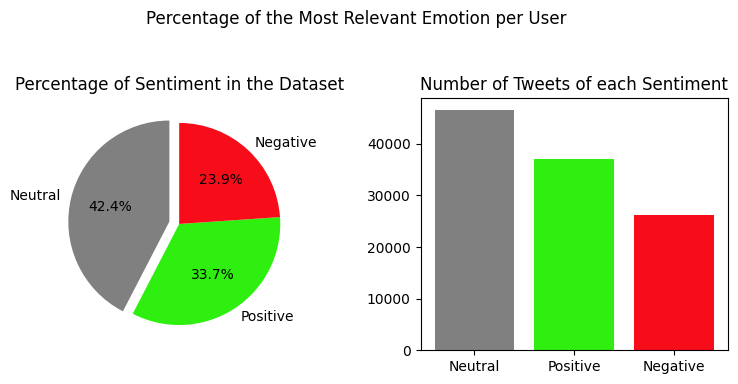

In [69]:
#create a plot that shows a piechart of emotion for each user

df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\After\\NGA_after_mre.csv")

pie_data = [df['mre'].value_counts()[0], df['mre'].value_counts()[1], df['mre'].value_counts()[2]]

#pie labels
pie_labels = ['Neutral', 'Positive', 'Negative']

#bar data
bar_data = [df['mre'].value_counts()[0], df['mre'].value_counts()[1], df['mre'].value_counts()[2]]

#bar labels
bar_labels = ['Neutral', 'Positive', 'Negative']

# Create the figure and subplot grid
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Create the pie chart in the first subplot
axs[0].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=['grey', '#2FEF10', '#f70d1a'] , explode=(0.1, 0, 0))

# Create the bar chart in the second subplot
axs[1].bar(bar_labels, bar_data, color=['grey', '#2FEF10', '#f70d1a'])

# Add labels and titles to the charts
axs[0].set_title('Percentage of Sentiment in the Dataset')
axs[1].set_title('Number of Tweets of each Sentiment')
fig.suptitle('Percentage of the Most Relevant Emotion per User')

# Adjust the layout and spacing of the subplots
fig.tight_layout(pad=2)

# Show the charts
plt.show()

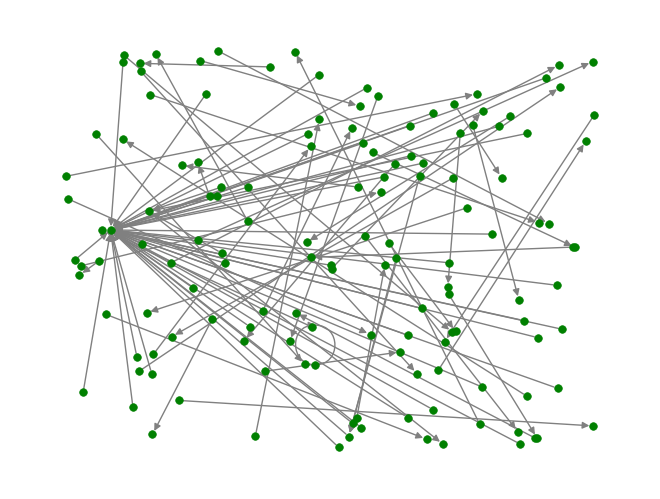

In [700]:
#CREATION OF NETWORK OF THE POSITIVE TWEETS

df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\Before\\mlc_before_emotions_w_mentions.csv")

#create network with only positive tweets
df = df[df['emotion'] == 'positive']

#sample of the dataframe
df = df.sample(n=100)

#create a network with only the usernames and mentioned usernames with nx.from_pandas_edgelist
G = nx.from_pandas_edgelist(df, source='usernames', target='mentioned_usernames', edge_attr=True, create_using=nx.DiGraph())

#draw the network
nx.draw_random(G, with_labels=False, node_color='green', node_size=30, edge_color='grey', linewidths=0.5, font_size=8) 

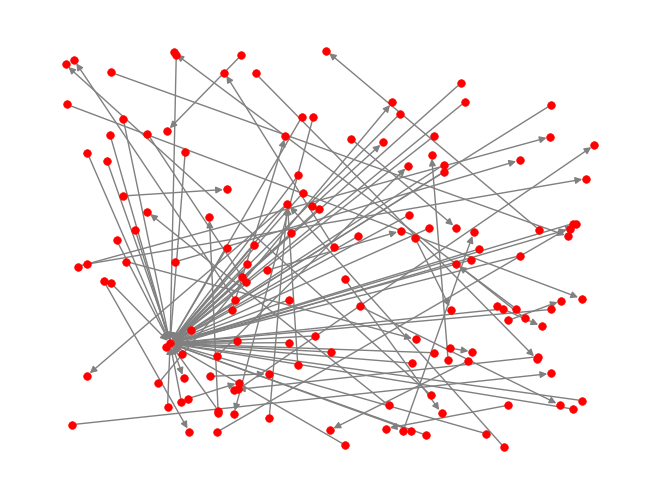

In [745]:
#CREATION OF THE NETWORK OF THE NEGATIVE TWEETS
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\Before\\mlc_before_emotions_w_mentions.csv")

#create network with only negative tweets
df = df[df['emotion'] == 'negative']

#sample of the dataframe
df = df.sample(n=100)

#create a network with only the usernames and mentioned usernames with nx.from_pandas_edgelist
G = nx.from_pandas_edgelist(df, source='usernames', target='mentioned_usernames', edge_attr=True, create_using=nx.DiGraph())

#draw the network
nx.draw_random(G, with_labels=False, node_color='red', node_size=30, edge_color='grey', linewidths=0.5, font_size=8) 

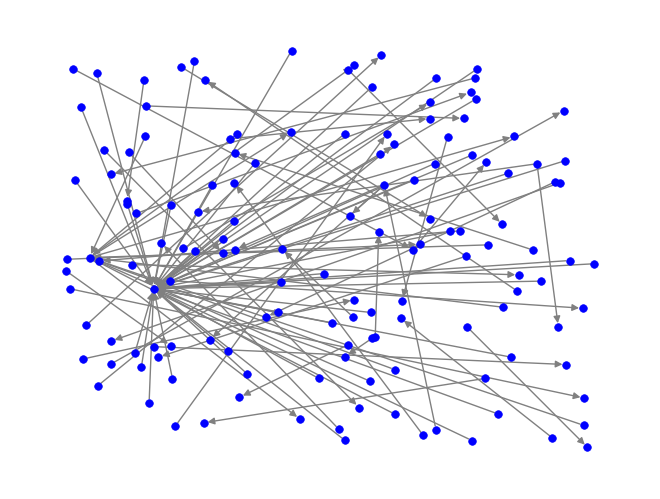

In [754]:
#CREATION OF THE NETWORK OF THE NEUTRAL TWEETS
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\Before\\mlc_before_emotions_w_mentions.csv")

#create network with only neutral tweets and with the highest retweet count
df = df[df['emotion'] == 'neutral']

#sample of the dataframe
df = df.sample(n=100)

#create a network with only the usernames and mentioned usernames with nx.from_pandas_edgelist
G = nx.from_pandas_edgelist(df, source='usernames', target='mentioned_usernames', edge_attr=True, create_using=nx.DiGraph())

#draw the network with a spectral layout
#nx.draw_random(G, with_labels=False, node_color='grey', node_size=30, edge_color='grey', linewidths=0.5, font_size=8)
nx.draw_random(G, with_labels=False, node_color='blue', node_size=30, edge_color='grey', linewidths=0.5, font_size=8)

In [12]:
#from the vader csv file create a dataframe with only usernames, mentioned_usernames, emotion and a specific language

def get_lan_df(df, lan):
    #remove the square brackets from the mentinedUsers column
    df['mentionedUsers'] = df['mentionedUsers'].str.strip('[]').astype(str)
    #extract the usernames
    df = extract_username(df)
    #get only the needed columns
    df = df[['usernames', 'mentioned_usernames', 'emotion', 'lang']]
    df = df[df['lang'] == lan]
    return df

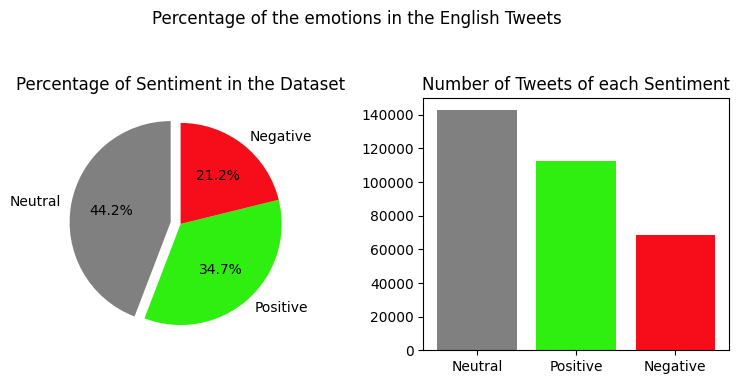

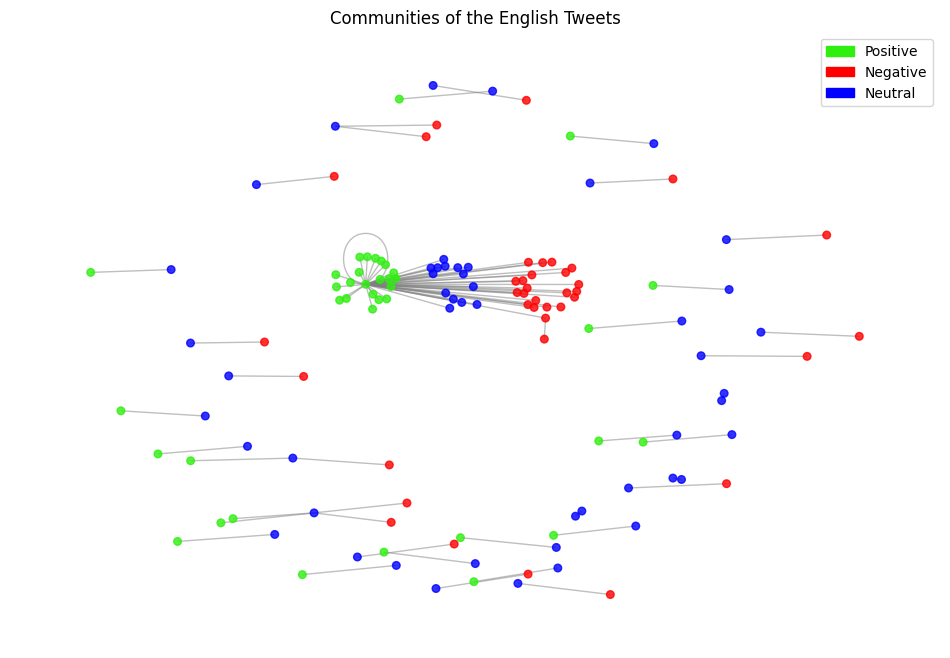

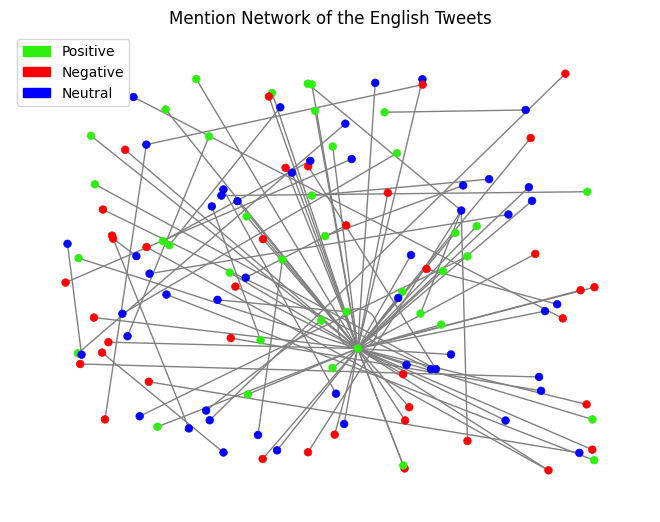

In [75]:
#CREATION OF BAR CHART, PIE CHART AND THE MENTION NETWORK WITH ONLY THE English TWEETS
import matplotlib
import matplotlib.patches as mpatches

df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\After\\NGA_after_EN.csv")

pie_data = [df['emotion'].value_counts()[0], df['emotion'].value_counts()[1], df['emotion'].value_counts()[2]]

#pie labels
pie_labels = ['Neutral', 'Positive', 'Negative']

#bar data
bar_data = [df['emotion'].value_counts()[0], df['emotion'].value_counts()[1], df['emotion'].value_counts()[2]]

#bar labels
bar_labels = ['Neutral', 'Positive', 'Negative']

# Create the figure and subplot grid
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Create the pie chart in the first subplot
axs[0].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=['grey', '#2FEF10', '#f70d1a'] , explode=(0.1, 0, 0))

# Create the bar chart in the second subplot
axs[1].bar(bar_labels, bar_data, color=['grey', '#2FEF10', '#f70d1a'])

# Add labels and titles to the charts
axs[0].set_title('Percentage of Sentiment in the Dataset')
axs[1].set_title('Number of Tweets of each Sentiment')
fig.suptitle('Percentage of the emotions in the English Tweets')

# Adjust the layout and spacing of the subplots
fig.tight_layout(pad=2)

# Show the charts
plt.show()

import community
from community import community_louvain


# Create subnetwork
df = df.sample(n=300)

# Create mention network from df
G = nx.from_pandas_edgelist(df, source='usernames', target='mentioned_usernames', edge_attr=True, create_using=nx.Graph())

# Assigning the emotion attribute to the nodes
nx.set_node_attributes(G, df.set_index('usernames')['emotion'].to_dict(), 'emotion')

# Creating a list of colors for the nodes
colors = []
for node in G.nodes:
    if 'emotion' in G.nodes[node] and G.nodes[node]['emotion'] == 'positive':
        colors.append('#2FEF10')
    elif 'emotion' in G.nodes[node] and G.nodes[node]['emotion'] == 'negative':
        colors.append('red')
    else:
        colors.append('blue')

# Creating communities based on the emotion attribute
partition = community_louvain.best_partition(G, weight='weight')

# Modifying the position of the nodes based on their emotion
pos = nx.spring_layout(G, seed=42)
for node, emotion in nx.get_node_attributes(G, 'emotion').items():
    if emotion == 'positive':
        pos[node][0] -= 0.3
    elif emotion == 'negative':
        pos[node][0] += 0.3

# Drawing the network with nodes clustered by emotion
fig, ax = plt.subplots(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=30, alpha=0.8, ax=ax)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, ax=ax)
#add title
plt.title('Communities of the English Tweets')

#add legend
plt.legend(handles=[mpatches.Patch(color='#2FEF10', label='Positive'),
                    mpatches.Patch(color='red', label='Negative'),
                    mpatches.Patch(color='blue', label='Neutral')])
plt.axis('off')
plt.show()

#total number of communities:  61



#create a mention network from df
G = nx.from_pandas_edgelist(df, source='usernames', target='mentioned_usernames', edge_attr=True, create_using=nx.Graph())

#add the attribute emotion to the nodes
nx.set_node_attributes(G, df.set_index('usernames')['emotion'].to_dict(), 'emotion')

#for node in G.nodes:
#    print(f"Node {node} has attributes: {G.nodes[node]}")

#create a list of colors for the nodes
colors = []
for node in G.nodes:
    if 'emotion' in G.nodes[node] and G.nodes[node]['emotion'] == 'positive':
        colors.append('#2FEF10')
    elif 'emotion' in G.nodes[node] and G.nodes[node]['emotion'] == 'negative':
        colors.append('red')
    else:
        colors.append('blue')
        
#draw the network
nx.draw_random(G, with_labels=False, node_color=colors, node_size=30, edge_color='grey', linewidths=0.5, font_size=8)
#add title to the network
plt.title('Mention Network of the English Tweets')
#add legend to the network with the colors
plt.legend(handles=[mpatches.Patch(color='#2FEF10', label='Positive'),
                    mpatches.Patch(color='red', label='Negative'),
                    mpatches.Patch(color='blue', label='Neutral')])

plt.axis('off')
plt.show()
#positive nodes are green, negative nodes are red and neutral nodes are blue



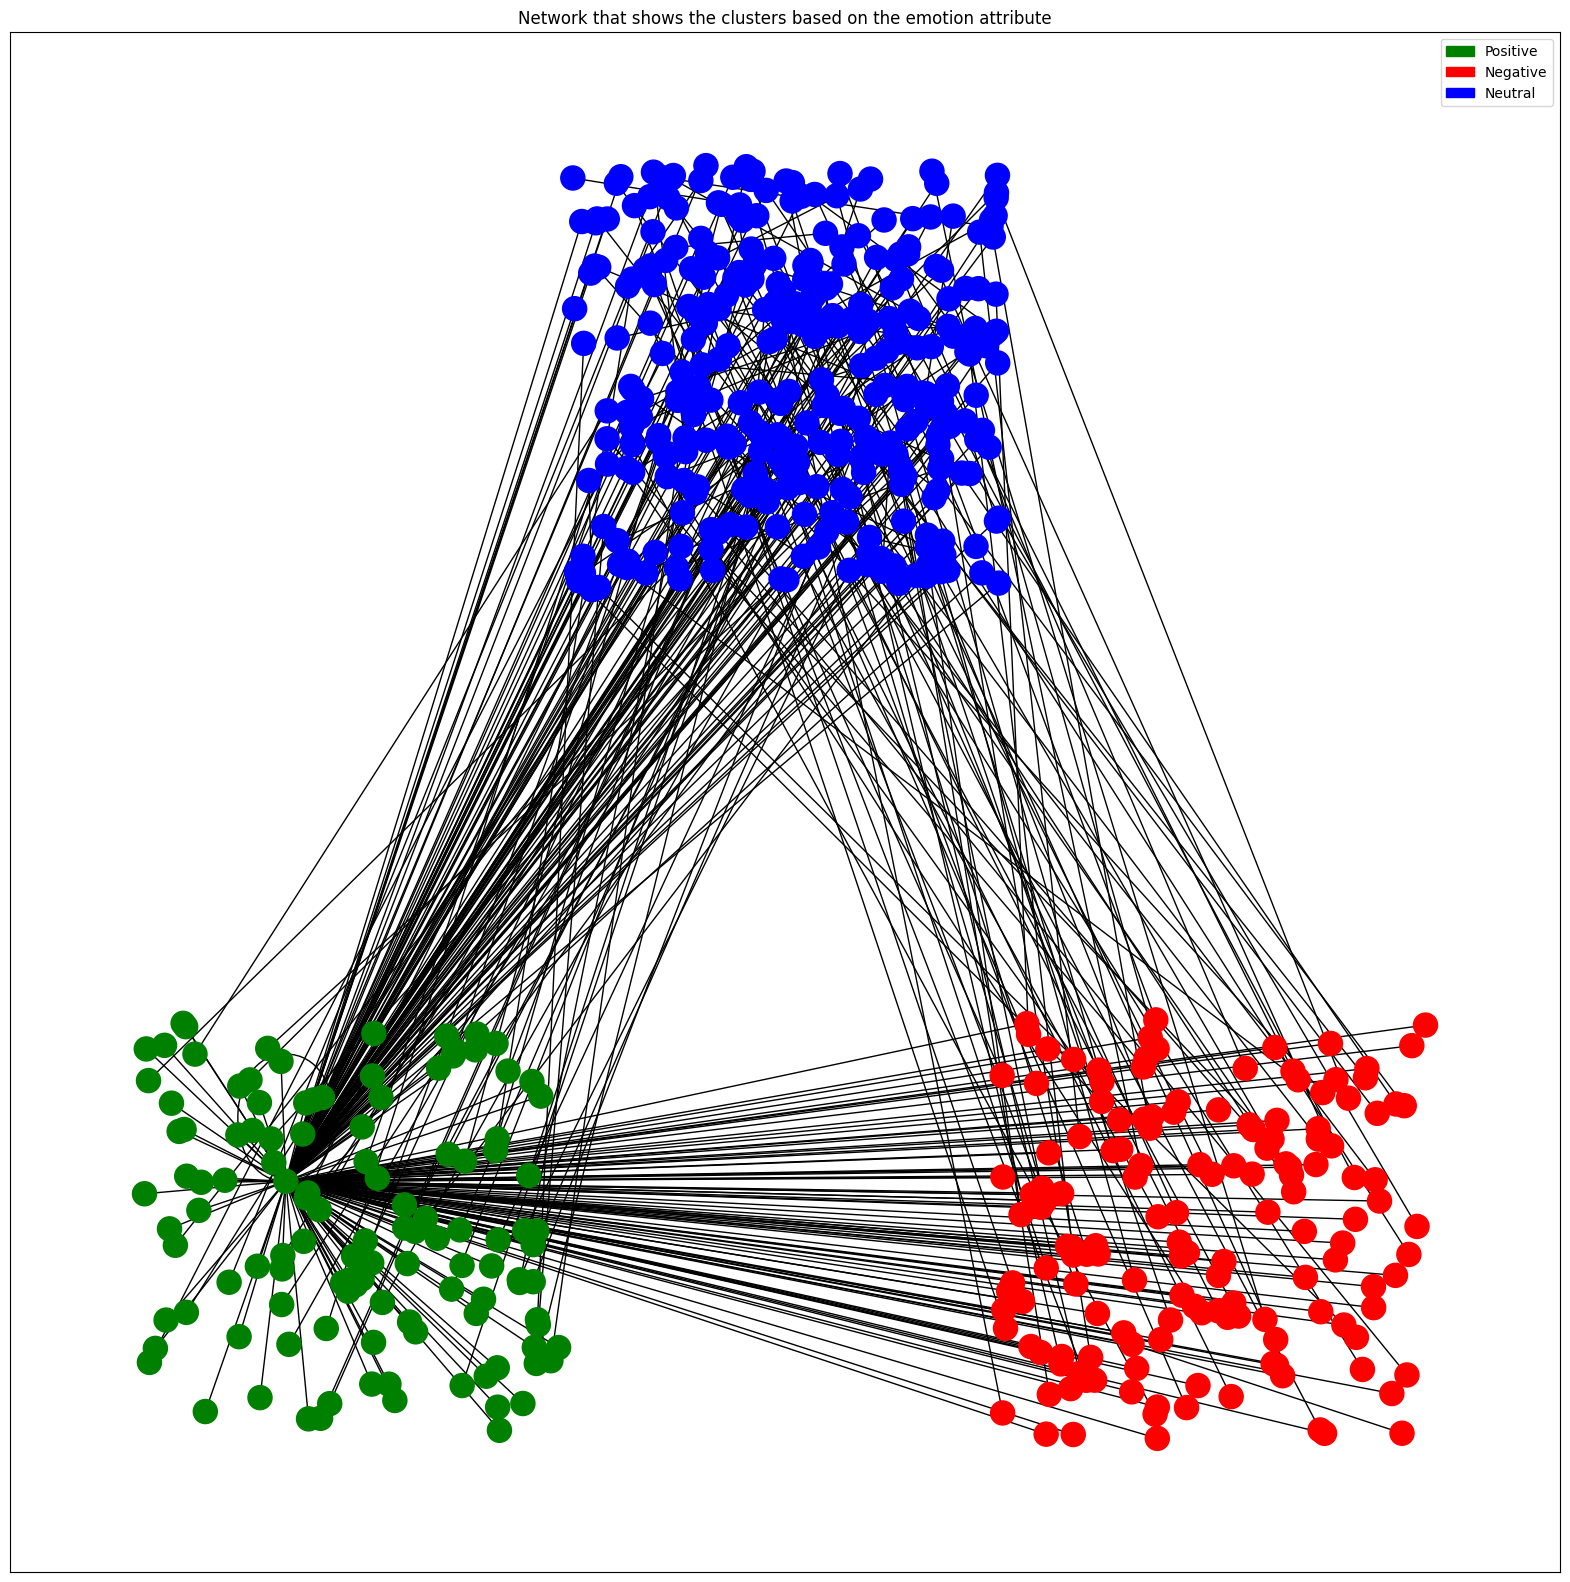

In [76]:
#CREATING A MENTION NETWORK OF THE TWEETS AND MANUALLY CLUSTERING THEM BASED ON THE EMOTION ATTRIBUTE
#create clusters based on the emotion attribute

df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\After\\NGA_after_usernames_w_mentions.csv")

#subset of the data
df = df.sample(n=1000)

#create a mention network from df
G = nx.from_pandas_edgelist(df, source='usernames', target='mentioned_usernames', edge_attr=True, create_using=nx.Graph())

#add the attribute emotion to the nodes
nx.set_node_attributes(G, df.set_index('usernames')['emotion'].to_dict(), 'emotion')

#for node in G.nodes:
#    print(f"Node {node} has attributes: {G.nodes[node]}")

#create a list of colors for the nodes
colors = []
for node in G.nodes:
    if 'emotion' in G.nodes[node] and G.nodes[node]['emotion'] == 'positive':
        colors.append('green')
    elif 'emotion' in G.nodes[node] and G.nodes[node]['emotion'] == 'negative':
        colors.append('red')
    else:
        colors.append('blue')
        
import random
#assign different positions to the nodes based on their emotion
node_positions = {}
for node in G.nodes:
    if 'emotion' in G.nodes[node] and G.nodes[node]['emotion'] == 'positive':
        node_positions[node] = (0+random.uniform(0, 0.5), 0+random.uniform(0, 0.5))
    elif 'emotion' in G.nodes[node] and G.nodes[node]['emotion'] == 'negative':
        node_positions[node] = (1+random.uniform(0, 0.5), 0+random.uniform(0, 0.5))
    else:
        node_positions[node] = (0.5+random.uniform(0, 0.5), 1+random.uniform(0, 0.5))

#increase the size of the figure
plt.figure(figsize=(20,20))

nx.draw_networkx_nodes(G, node_positions, node_color=colors)
nx.draw_networkx_edges(G, node_positions)

#add title to the network
plt.title('Network that shows the clusters based on the emotion attribute')

#add legend to the network with the colors
plt.legend(handles=[mpatches.Patch(color='green', label='Positive'),
                    mpatches.Patch(color='red', label='Negative'),
                    mpatches.Patch(color='blue', label='Neutral')])

plt.show()

#draw the nodes with the same attribute next to each other


In [908]:
#TEMPLATE TO GET ALL THE TWEETS REGARDING JUSTSTOP_OIL

df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\mlc_after_jso_test.csv")

#delete the rows that do not contain JustStop_Oil as usernames or mentioned usernames
df = df[(df['usernames'] == "['JustStop_Oil']") | df['mentioned_usernames'].str.contains('JustStop_Oil')]

df.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\mlc_after_jso_test_1.csv", index=False)

In [911]:
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\mlc_after_jso.csv")
#find how many times JustStop_Oil is mentioned
print(df['mentioned_usernames'].str.contains('JustStop_Oil').sum())


1954


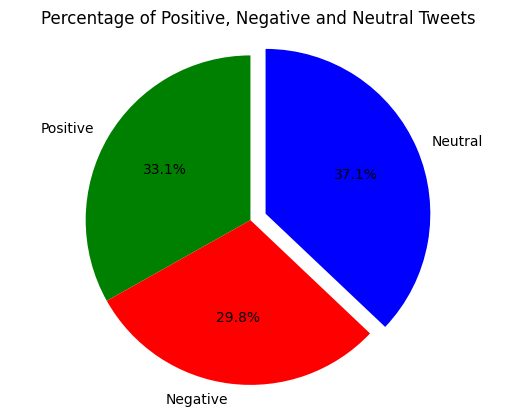

In [83]:
#ANALYSE THE TWEETS AND MENTIONS OF JUST STOP OIL
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\NationalGalleryOfArt_EN\\Before\\NGA_before_mre.csv")

#delete rows with no mentioned usernames
#df = df[df['mentioned_usernames'] != '[]']

#split the mentioned usernames column into rows
df = df.set_index(df.columns.drop('mentioned_usernames',1).tolist()).mentioned_usernames.str.split(',', expand=True).stack().reset_index().rename(columns={0:'mentioned_usernames'}).loc[:, df.columns]

#create a network
G = nx.from_pandas_edgelist(df, source='usernames', target='mentioned_usernames', edge_attr=True, create_using=nx.Graph())

#add the attribute emotion to the nodes
nx.set_node_attributes(G, df.set_index('usernames')['emotion'].to_dict(), 'emotion')

#for node in G.nodes:
#    print(f"Node {node} has attributes: {G.nodes[node]}")

#create a list of colors for the nodes
colors = []
for node in G.nodes:
    if 'emotion' in G.nodes[node] and G.nodes[node]['emotion'] == 'positive':
        colors.append('green')
    elif 'emotion' in G.nodes[node] and G.nodes[node]['emotion'] == 'negative':
        colors.append('red')
    else:
        colors.append('blue')
        
plt.figure(figsize=(20,20))
#draw the network
nx.draw_spring(G, with_labels=False, node_color=colors, node_size=30, edge_color='grey', linewidths=0.5, font_size=8)

#add title to the network
plt.title('Mention Network of JustStopOil Tweets')
#add legend to the network with the colors
plt.legend(handles=[mpatches.Patch(color='green', label='Positive'),
                    mpatches.Patch(color='red', label='Negative'),
                    mpatches.Patch(color='blue', label='Neutral')])

#draw a pie chart with the percentage of positive, negative and neutral tweets
labels = 'Positive', 'Negative', 'Neutral'

#count the number of positive, negative and neutral tweets
positive = df['emotion'].str.contains('positive').sum()
negative = df['emotion'].str.contains('negative').sum()
neutral = df['emotion'].str.contains('neutral').sum()

sizes = [positive, negative, neutral]

#assing the colors green, red, blue = positive, negative, neutral
colors = ['green', 'red', 'blue']


#only "explode" the 2nd slice (i.e. 'Hogs')

explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Positive, Negative and Neutral Tweets')
plt.show()

In [74]:
#GET THE MRE DF OF THE BEFORE AND AFTER DFS

df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\Before\\mlc_before_mre.csv")
df1 = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\mlc_after_mre.csv")

#merge the dfs on the usernames
df = pd.merge(df, df1, on='usernames')

#rename the columns to mre_before and mre_after
df = df.rename(columns={'mre_x': 'mre_before', 'mre_y': 'mre_after'})

df.head()

usernames  mre_before  mre_percentage_x    mre_after  mre_percentage_y
0      '00Sudip'  'negative'             100.0   'negative'             100.0
1     '1059WSNP'   'neutral'             100.0    'neutral'             100.0
2     '1999_jab'   'neutral'              75.0    'neutral'             100.0
3  '1ChrisMPate'  'positive'             100.0   'positive'             100.0
4  '1___nargess'  'positive'             100.0   'negative'             100.0

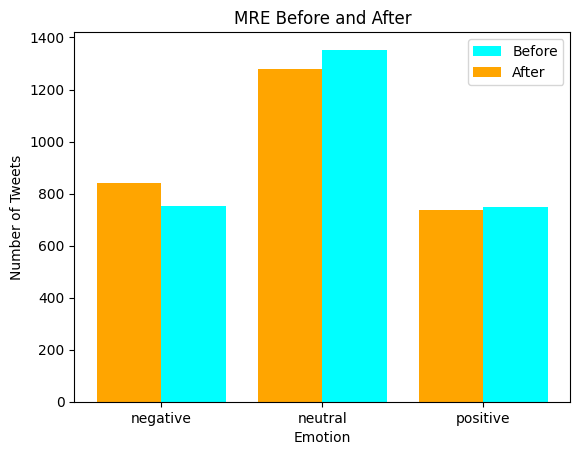

In [131]:
#CONFRONTING THE MRE BEFORE AND AFTER

# read the data
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\Before\\mlc_before_mre.csv")
df1 = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\mlc_after_mre.csv")

# merge the dfs on the usernames
df = pd.merge(df, df1, on='usernames')

# rename the columns to mre_before and mre_after
df = df.rename(columns={'mre_x': 'mre_before', 'mre_y': 'mre_after'})

# define the data for the multi-bar plot
emotions = ['negative', 'neutral', 'positive']
values_before = [df['mre_before'].str.count('negative').sum(), df['mre_before'].str.count('neutral').sum(), df['mre_before'].str.count('positive').sum()]
values_after = [df['mre_after'].str.count('negative').sum(), df['mre_after'].str.count('neutral').sum(), df['mre_after'].str.count('positive').sum()]

# create the multi-bar plot
fig, ax = plt.subplots()

# create the bars that do not overlap
ax.bar(emotions, values_before, color='aqua', width=0.4, align='edge', label='Before')
ax.bar(emotions, values_after, color='orange', width=-0.4, align='edge', label='After')

# add the legend
ax.legend()

# add the title
ax.set_title('MRE Before and After')

plt.ylabel('Number of Tweets')
plt.xlabel('Emotion')

#change background color to transparent
fig.patch.set_facecolor('white')

# show the plot
plt.show()

55.746320953048354


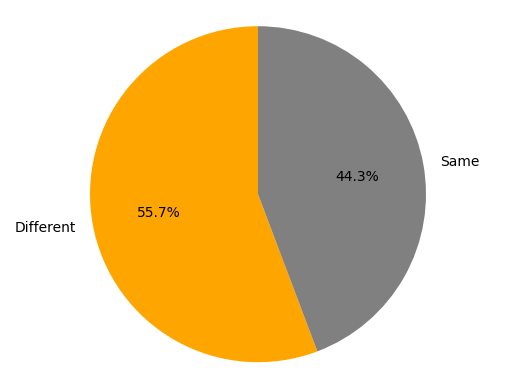

In [104]:
# read the data
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\Before\\mlc_before_mre.csv")
df1 = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\mlc_after_mre.csv")

# merge the dfs on the usernames
df = pd.merge(df, df1, on='usernames')

# rename the columns to mre_before and mre_after
df = df.rename(columns={'mre_x': 'mre_before', 'mre_y': 'mre_after'})

#create a variable that represents the percentage of users who have a different mre_after from mre_before
different = 0
for index, row in df.iterrows():
    if row['mre_before'] != row['mre_after']:
        different += 1

#calculate the percentage
percentage = (different/len(df))*100

print(percentage)

#create a pie chart with the percentage of users who have a different mre_after from mre_before
labels = 'Different', 'Same'

sizes = [percentage, 100-percentage]

#only "explode" the 2nd slice (i.e. 'Hogs')
 
fig1, ax1 = plt.subplots()
 
#change colors of the pie chart
colors = ['orange', 'grey']

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors=colors)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#the percentage who have a different, check their emotion before and after TO DO

In [126]:
#CREATING A DF WITH THE SAME USERS AND ESTIMATING THE MOST EMOTION SWITCHED FROM AND SWITCHED TO

#FIRST CREATE A DF WITH THE ONLY DIFFERENT MRE
#CREATE A DF WITH THE MOST COMMON EMOTION BEFORE AND FINDING THE MOST COMMON EMOTION AFTER

# read the data
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\Before\\mlc_before_mre.csv")
df1 = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\mlc_after_mre.csv")

# merge the dfs on the usernames
df = pd.merge(df, df1, on='usernames')

# rename the columns to mre_before and mre_after
df = df.rename(columns={'mre_x': 'mre_before', 'mre_y': 'mre_after'})

#create a df with only the users who have a different mre_after from mre_before
df = df[df['mre_before'] != df['mre_after']]

#count the most common emotion before
emotion_before = df['mre_before'].value_counts().idxmax()

#count the most common emotion after
emotion_after = df['mre_after'].value_counts().idxmax()

#print the results
print("The most common emotion before is " + emotion_before)
print("The most common emotion after is " + emotion_after)

# GETTING THE MOST COMMON EMOTION SWITCHED FROM

#first we get a dataframe containing the most common emotion after

#create a new df with only the mre_after = neutral
df1 = df[df['mre_after'] == "'neutral'"]

#get the most common emotion before
emotion_before = df1['mre_before'].value_counts().idxmax()
#print the result
print("The most common switched from is " + emotion_before)

# GETTING THE MOST COMMON EMOTION SWITCHED TO

#first we get a dataframe containing the most common emotion before

#create a new df with only the mre_before = neutral
df2 = df[df['mre_before'] == "'neutral'"]

#get the most common emotion after
emotion_after = df2['mre_after'].value_counts().idxmax()
#print the result
print("The most common switched to is" + emotion_after)

The most common emotion before is 'neutral'
The most common emotion after is 'neutral'
The most common switched from is 'negative'
The most common switched to is 'neutral'
